Vi starter med at definere en funktion for vores forsøg. En måling defineres som at slå med en terning N gange og lægge øjnene sammen. Dette gentages så 10 000 gange.

In [3]:
import numpy as np

# Kast en terning N gange og lægger øjnene sammen. Gentager dette 10 000 gange.
def diceroll(N):
    # Terningens egenskaber
    muligheder = [1,2,3,4,5,6]
    # Jeg har valgt ikke at vægte terningen, da det var svært at fitte normalfordelingen til en vægtet terning.
    sandsynligheder = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
    kast_arr = np.random.choice(muligheder, (10000, N), p=sandsynligheder)
    return [np.sum(kast) for kast in kast_arr]
    



Tæthedsfunktionen for normalfordelingen.

In [4]:
# Normalfordelingen
def normal_distribution(x, sigma, mu, k):
    return (1/(sigma * np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/2*(sigma**2)) * k


Denne blok udregner histogram/normalfordelingsfit for et givent N og plotter det.

In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def dice_data(N):
    data = diceroll(N)

    # Udregn antal bins
    bin_num = np.arange(np.min(data),np.max(data)+2)

    # Lav histogrammet
    counts, bin_edges, patches = plt.hist(data, bins=bin_num, color="skyblue", alpha=0.8, label="Histogram")

    # Find midten af binsne
    bin_centers = np.delete(bin_edges, -1)
    bin_centers += 0.5

    #plt.scatter(bin_centers, counts, color="r", marker=".")

    # Fit tæthedsfunktionen fra normalfordelingen til histogrammet
    # Startgæt
    sigma_g = 1
    # Vi sætter mu til det punkt der hører til midten af histogrammet (der hvor counts er højest)
    mu_g = float(bin_centers[np.where(counts == (max(counts)))])
    k_g = 1

    # For N = 1 er startgættene fundet ved at prøve sig frem
    if N == 1:
        sigma_g = 0.1
        mu_g = 3.5
        k_g = 0.1

    # Lav fit til normalfordelingen
    par, cov = curve_fit(normal_distribution, bin_centers, counts, p0=[sigma_g, mu_g, k_g], maxfev=10000)
    
    # Middelværdi og standardafvigelse findes ud fra parametrene fra fittet
    # NEJ! virker ikke for N = 1
    sigma, mu, k = par

    # Find usikkerhed på middelværdien
    mu_uncertainty = sigma / np.sqrt(len(data))

    # Plot middelværdien
    plt.axvline(mu, color="b", label="Middelværdi")
    
    # Plot tæthedsfunktionen
    X = np.linspace(0, max(bin_edges + 2), 100*len(data))
    plt.plot(X, normal_distribution(X, *par), color="r", linestyle='dashed', label="Fit til tæthedsfunktionen")

    plt.xlim(min(bin_edges - 1), max(bin_edges + 1))
    plt.title("Histogram over forsøg med N = {}".format(N))
    plt.grid()
    plt.legend()
    plt.show()



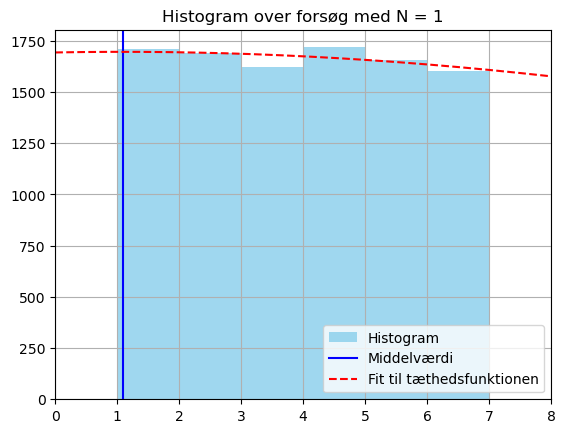

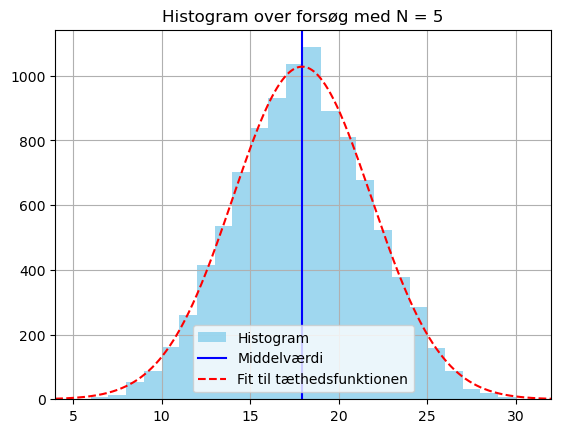

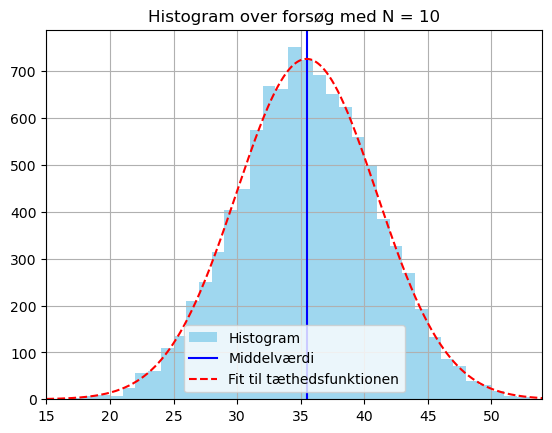

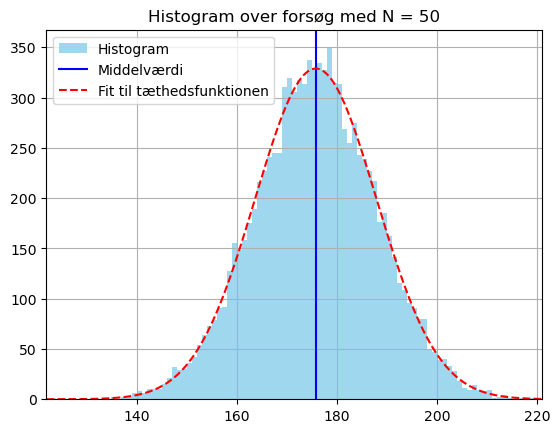

In [6]:
dice_data(1)
dice_data(5)
dice_data(10)
dice_data(50)